In [3]:
'''
#### Goal:
In this Project we are going to study the features affecting the price of House/apartments through a online e commerce platform.

* E-commerce Website: Olx.in

Price of a house can be depends on so many factors like , square feet, number of bedrooms, area, facilities available like etc..

This project will be in These Modules

* Collection of Data from Olx Website ---- Webscraping
* Data Validation & Cleaning of Collected data
* Analysis Of Collected Data          ---- EDA & Visualizations
* Predictive Modeling of Price        ---- Machine Learning
* Evaluation                          ---- Model Performance Check
* Deployment                          ---- Availability of our predictive model to end user
'''

'\n#### Goal:\nIn this Project we are going to study the features affecting the price of House/apartments through a online e commerce platform.\n\n* E-commerce Website: Olx.in\n\nPrice of a house can be depends on so many factors like , square feet, number of bedrooms, area, facilities available like etc..\n\nThis project will be in These Modules\n\n* Collection of Data from Olx Website ---- Webscraping\n* Data Validation & Cleaning of Collected data\n* Analysis Of Collected Data          ---- EDA & Visualizations\n* Predictive Modeling of Price        ---- Machine Learning\n* Evaluation                          ---- Model Performance Check\n* Deployment                          ---- Availability of our predictive model to end user\n'

#### Loading Saved Data from Web Scraping

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [6]:
raw = pd.read_csv("raw.csv")

For the collected data we are going to do,

* Data Cleaning
* Missing Values Treatment
* EDA Analysis
* Visual Analysis
* Data Preprocessing
* Modeling
* Evaluation

In [7]:
raw.head()

,Ad_link,location,house_type,sqft,bedrooms,bathrooms,furnishing,constr_info,floor_no,facing,price
0,https://www.olx.in/item/book-3bhk-in-hero-home...,"Sector 88, Mohali, Punjab",['Apartments'],['1481'],['3'],['3'],['Semi-Furnished'],['New Launch'],['4'],['North-East'],"₹ 85,30,000"
1,https://www.olx.in/item/3055-3bhk-brand-new-ho...,"JP Nagar, Mysuru, Karnataka",['Houses & Villas'],['1650'],['3'],['3'],['Furnished'],['Ready to Move'],NaN,['South-East'],"₹ 1,05,00,000"
2,https://www.olx.in/item/4bhk-ready-possession-...,"Pal Village, Surat, Gujarat",['Apartments'],['3051'],['4'],['4'],['Semi-Furnished'],['Ready to Move'],['2'],['East'],"₹ 1,70,00,000"
3,https://www.olx.in/item/12-cents-with-old-hous...,"Thevara, Kochi, Kerala",['Houses & Villas'],['3000'],['4'],NaN,NaN,NaN,NaN,NaN,"₹ 1,50,00,000"
4,https://www.olx.in/item/1bhk-flat-in-laxmi-nag...,"Mayur Vihar, Jaipur, Rajasthan",['Apartments'],['450'],['1'],['1'],['Semi-Furnished'],['Ready to Move'],['1'],['East'],"₹ 10,50,000"


In [8]:
raw.shape

(452, 11)

In [9]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ad_link      452 non-null    object
 1   location     375 non-null    object
 2   house_type   374 non-null    object
 3   sqft         374 non-null    object
 4   bedrooms     368 non-null    object
 5   bathrooms    367 non-null    object
 6   furnishing   367 non-null    object
 7   constr_info  368 non-null    object
 8   floor_no     235 non-null    object
 9   facing       281 non-null    object
 10  price        375 non-null    object
dtypes: object(11)
memory usage: 39.0+ KB


#### Intial Check for Duplicates and Missing Values

In [10]:
rawcheck = raw.drop_duplicates()

In [11]:
rawcheck = rawcheck.dropna().reset_index(drop=True)

In [12]:
rawcheck.isnull().sum()

Ad_link        0
location       0
house_type     0
sqft           0
bedrooms       0
bathrooms      0
furnishing     0
constr_info    0
floor_no       0
facing         0
price          0
dtype: int64

many rows are dropped , conisdering raw data , lets look after data cleaning for this

#### 1. Data Cleaning

* cleaning columns data by removing extra symbols and other

In [13]:
raw.head()

,Ad_link,location,house_type,sqft,bedrooms,bathrooms,furnishing,constr_info,floor_no,facing,price
0,https://www.olx.in/item/book-3bhk-in-hero-home...,"Sector 88, Mohali, Punjab",['Apartments'],['1481'],['3'],['3'],['Semi-Furnished'],['New Launch'],['4'],['North-East'],"₹ 85,30,000"
1,https://www.olx.in/item/3055-3bhk-brand-new-ho...,"JP Nagar, Mysuru, Karnataka",['Houses & Villas'],['1650'],['3'],['3'],['Furnished'],['Ready to Move'],NaN,['South-East'],"₹ 1,05,00,000"
2,https://www.olx.in/item/4bhk-ready-possession-...,"Pal Village, Surat, Gujarat",['Apartments'],['3051'],['4'],['4'],['Semi-Furnished'],['Ready to Move'],['2'],['East'],"₹ 1,70,00,000"
3,https://www.olx.in/item/12-cents-with-old-hous...,"Thevara, Kochi, Kerala",['Houses & Villas'],['3000'],['4'],NaN,NaN,NaN,NaN,NaN,"₹ 1,50,00,000"
4,https://www.olx.in/item/1bhk-flat-in-laxmi-nag...,"Mayur Vihar, Jaipur, Rajasthan",['Apartments'],['450'],['1'],['1'],['Semi-Furnished'],['Ready to Move'],['1'],['East'],"₹ 10,50,000"


In [14]:
raw.price.unique()

array(['₹ 85,30,000', '₹ 1,05,00,000', '₹ 1,70,00,000', '₹ 1,50,00,000',
       '₹ 10,50,000', '₹ 29,00,000', '₹ 60,00,000', '₹ 55,00,000',
       '₹ 45,00,000', '₹ 65,00,000', '₹ 27,92,356', '₹ 27,99,632',
       '₹ 27,96,666', '₹ 33,00,000', '₹ 41,00,000', '₹ 30,51,000',
       '₹ 36,87,454', '₹ 41,99,000', '₹ 32,50,000', '₹ 38,00,000',
       '₹ 80,00,000', '₹ 49,29,000', '₹ 50,45,000', '₹ 72,40,000',
       '₹ 35,60,000', '₹ 42,00,000', '₹ 1,15,00,000', '₹ 70,00,000',
       '₹ 57,00,000', '₹ 50,00,000', '₹ 82,00,000', '₹ 22,00,000',
       '₹ 62,00,000', '₹ 25,00,000', '₹ 23,00,000', '₹ 22,50,000',
       '₹ 28,00,000', '₹ 27,50,000', '₹ 69,00,000', nan, '₹ 39,90,000',
       '₹ 35,00,000', '₹ 20,94,567', '₹ 20,99,658', '₹ 29,99,963',
       '₹ 75,00,000', '₹ 72,46,000', '₹ 2,15,00,000', '₹ 99,99,999',
       '₹ 39,00,000', '₹ 66,00,000', '₹ 42,50,000', '₹ 1,30,00,000',
       '₹ 30,11,000', '₹ 58,00,000', '₹ 79,89,000', '₹ 51,80,000',
       '₹ 52,60,000', '₹ 1,06,00,000', '₹ 14,

In [15]:
# price

raw['price'] = raw['price'].str.replace(",","").str.replace("₹","").str.strip().astype(float)/1000

In [16]:
raw.facing.unique()

array(["['North-East']", "['South-East']", "['East']", nan, "['West']",
       "['South-West']", "['North']", "['South']", "['North-West']"],
      dtype=object)

In [17]:
# facing

for i in range(0,len(raw)):
    try:
        raw['facing'][i] = raw['facing'][i].strip("['']").lower().replace("-","")
    except:
        continue

In [18]:
raw.floor_no.unique()

array(["['4']", nan, "['2']", "['1']", "['0']", "['7']", "['8']", "['5']",
       "['9']", "['3']", "['12']", "['20']", "['6']", "['16']", "['03']",
       "['00']", "['10']", "['18']"], dtype=object)

In [19]:
# floor_number

for i in range(0,len(raw)):
    try:
        raw['floor_no'][i] = raw['floor_no'][i].strip("['']")
    except:
        continue

In [20]:
raw.floor_no = raw.floor_no.astype(float)

In [21]:
raw.constr_info.unique()

array(["['New Launch']", "['Ready to Move']", nan,
       "['Under Construction']"], dtype=object)

In [22]:
# Construction Status

for i in range(0,len(raw)):
    try:
        raw['constr_info'][i] = raw['constr_info'][i].strip("['']").lower().replace(" ","")
    except:
        continue

In [23]:
raw.furnishing.unique()

array(["['Semi-Furnished']", "['Furnished']", nan, "['Unfurnished']"],
      dtype=object)

In [24]:
# furnishing

for i in range(0,len(raw)):
    try:
        raw['furnishing'][i] = raw['furnishing'][i].strip("['']").lower().replace("-","")
    except:
        continue

In [25]:
raw.bathrooms.unique()

array(["['3']", "['4']", nan, "['1']", "['2']", "['4+']"], dtype=object)

In [26]:
# bathrooms

for i in range(0,len(raw)):
    try:
        raw['bathrooms'][i] = raw['bathrooms'][i].strip("['']")
    except:
        continue

In [27]:
raw.bathrooms.replace('4+', '5', inplace=True)
raw.bathrooms = raw.bathrooms.astype(float)

In [28]:
raw.bedrooms.unique()

array(["['3']", "['4']", "['1']", "['2']", nan, "['4+']"], dtype=object)

In [29]:
# bedrooms

for i in range(0,len(raw)):
    try:
        raw['bedrooms'][i] = raw['bedrooms'][i].strip("['']")
    except:
        continue

In [30]:
raw.bedrooms.replace('4+', '5', inplace=True)
raw.bedrooms = raw.bedrooms.astype(float)

In [31]:
raw.sqft.unique()

array(["['1481']", "['1650']", "['3051']", "['3000']", "['450']",
       "['1200']", "['1500']", "['1600']", "['920']", "['1400']",
       "['1050']", "['1150']", "['900']", "['1300']", "['00']",
       "['1285']", "['2100']", "['1250']", "['938']", "['985']",
       "['1592']", "['791']", "['125']", "['1750']", "['1900']",
       "['1800']", "['117']", "['715']", "['1350']", "['850']", nan,
       "['1298']", "['1080']", "['1100']", "['921']", "['1550']",
       "['784']", "['1432']", "['950']", "['2900']", "['2390']",
       "['1738']", "['2398']", "['1700']", "['4500']", "['800']",
       "['1685']", "['1064']", "['974']", "['2200']", "['1395']",
       "['2700']", "['625']", "['1950']", "['1110']", "['1130']",
       "['1209']", "['300']", "['543']", "['1233']", "['712']", "['771']",
       "['2500']", "['2360']", "['1000']", "['1537']", "['991']",
       "['2000']", "['24']", "['1230']", "['2300']", "['513']", "['423']",
       "['725']", "['1066']", "['720']", "['520']", "['650']

In [32]:
# sqft

for i in range(0,len(raw)):
    try:
        raw['sqft'][i] = raw['sqft'][i].strip("['']")
    except:
        continue

In [33]:
raw.sqft = raw.sqft.astype(float)

In [34]:
raw.house_type.unique()

array(["['Apartments']", "['Houses & Villas']", "['Builder Floors']", nan,
       "['Farm Houses']"], dtype=object)

In [35]:
# House_type

for i in range(0,len(raw)):
    try:
        raw['house_type'][i] = raw['house_type'][i].strip("['']").lower().replace(" ","").replace("&","")
    except:
        continue

In [36]:
raw.location.unique()

array(['Sector 88, Mohali, Punjab', 'JP Nagar, Mysuru, Karnataka',
       'Pal Village, Surat, Gujarat', 'Thevara, Kochi, Kerala',
       'Mayur Vihar, Jaipur, Rajasthan',
       'Hanumant Nagar, Jaipur, Rajasthan', 'Kakkanad, Kochi, Kerala',
       'Peelamedu, Coimbatore, Tamil Nadu',
       'Pantheerankavu, Olavanna, Kerala',
       'Kalwar Road, Jaipur, Rajasthan', 'Niwaru Road, Jaipur, Rajasthan',
       'Laxmi Nagar, Jaipur, Rajasthan',
       'Nagondapalli, Mathigiri, Tamil Nadu', 'Edapally, Kochi, Kerala',
       'Waghodia Road, Vadodara, Gujarat',
       'Kazhakoottam, Thiruvananthapuram, Kerala',
       'Patancheru, Hyderabad, Telangana', 'Bill Road, Vadodara, Gujarat',
       'Ved Vyas Puri, Meerut, Uttar Pradesh',
       'Ottapalam, Ottappalam, Kerala', 'Punkunnam, Thrissur, Kerala',
       'Kharadi, Pune, Maharashtra', 'Kalyani Nagar, Pune, Maharashtra',
       'Chandkheda, Ahmedabad, Gujarat', 'Sector 66A, Mohali, Punjab',
       'Thirumala, Thiruvananthapuram, Kerala',
  

In [37]:
# location

raw['city'] = np.nan
raw['state'] = np.nan

for i in range(0,len(raw)):
    try:
        city, state = raw['location'][i].strip().split(",")[-2:]
        raw['city'][i] = city
        raw['state'][i] = state
        
    except:
        continue

In [38]:
raw.head()

,Ad_link,location,house_type,sqft,bedrooms,bathrooms,furnishing,constr_info,floor_no,facing,price,city,state
0,https://www.olx.in/item/book-3bhk-in-hero-home...,"Sector 88, Mohali, Punjab",apartments,1481.0,3.0,3.0,semifurnished,newlaunch,4.0,northeast,8530.0,Mohali,Punjab
1,https://www.olx.in/item/3055-3bhk-brand-new-ho...,"JP Nagar, Mysuru, Karnataka",housesvillas,1650.0,3.0,3.0,furnished,readytomove,NaN,southeast,10500.0,Mysuru,Karnataka
2,https://www.olx.in/item/4bhk-ready-possession-...,"Pal Village, Surat, Gujarat",apartments,3051.0,4.0,4.0,semifurnished,readytomove,2.0,east,17000.0,Surat,Gujarat
3,https://www.olx.in/item/12-cents-with-old-hous...,"Thevara, Kochi, Kerala",housesvillas,3000.0,4.0,NaN,NaN,NaN,NaN,NaN,15000.0,Kochi,Kerala
4,https://www.olx.in/item/1bhk-flat-in-laxmi-nag...,"Mayur Vihar, Jaipur, Rajasthan",apartments,450.0,1.0,1.0,semifurnished,readytomove,1.0,east,1050.0,Jaipur,Rajasthan


#### Cleaned data

In [39]:
data = raw[['state','city','house_type','sqft','bedrooms','bathrooms',
           'furnishing','constr_info','floor_no','facing','price']]

In [40]:
data.head()

,state,city,house_type,sqft,bedrooms,bathrooms,furnishing,constr_info,floor_no,facing,price
0,Punjab,Mohali,apartments,1481.0,3.0,3.0,semifurnished,newlaunch,4.0,northeast,8530.0
1,Karnataka,Mysuru,housesvillas,1650.0,3.0,3.0,furnished,readytomove,NaN,southeast,10500.0
2,Gujarat,Surat,apartments,3051.0,4.0,4.0,semifurnished,readytomove,2.0,east,17000.0
3,Kerala,Kochi,housesvillas,3000.0,4.0,NaN,NaN,NaN,NaN,NaN,15000.0
4,Rajasthan,Jaipur,apartments,450.0,1.0,1.0,semifurnished,readytomove,1.0,east,1050.0


In [41]:
data.to_csv("cleaned.csv", index=False)

#### Missing Values

In [42]:
data.isnull().sum()

state           77
city            77
house_type      78
sqft            78
bedrooms        84
bathrooms       85
furnishing      85
constr_info     84
floor_no       217
facing         171
price           77
dtype: int64

In [43]:
data.dtypes

state           object
city            object
house_type      object
sqft           float64
bedrooms       float64
bathrooms      float64
furnishing      object
constr_info     object
floor_no       float64
facing          object
price          float64
dtype: object

In [44]:
# Replacing Missing values with one single loop for both numerical and categorical

for i in data.columns:
    if data[i].dtype == 'object':
        modevalue = data[i].mode()[0]
        data[i].fillna(modevalue, inplace = True)
    elif data[i].dtype == 'int32' or 'int64' or 'float64':
        data[i].fillna(data[i].median(), inplace = True)

#### 2. EDA

In [45]:
data.head()

,state,city,house_type,sqft,bedrooms,bathrooms,furnishing,constr_info,floor_no,facing,price
0,Punjab,Mohali,apartments,1481.0,3.0,3.0,semifurnished,newlaunch,4.0,northeast,8530.0
1,Karnataka,Mysuru,housesvillas,1650.0,3.0,3.0,furnished,readytomove,1.0,southeast,10500.0
2,Gujarat,Surat,apartments,3051.0,4.0,4.0,semifurnished,readytomove,2.0,east,17000.0
3,Kerala,Kochi,housesvillas,3000.0,4.0,2.0,semifurnished,readytomove,1.0,east,15000.0
4,Rajasthan,Jaipur,apartments,450.0,1.0,1.0,semifurnished,readytomove,1.0,east,1050.0


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        452 non-null    object 
 1   city         452 non-null    object 
 2   house_type   452 non-null    object 
 3   sqft         452 non-null    float64
 4   bedrooms     452 non-null    float64
 5   bathrooms    452 non-null    float64
 6   furnishing   452 non-null    object 
 7   constr_info  452 non-null    object 
 8   floor_no     452 non-null    float64
 9   facing       452 non-null    object 
 10  price        452 non-null    float64
dtypes: float64(5), object(6)
memory usage: 39.0+ KB


In [47]:
data.describe(include = 'all')

,state,city,house_type,sqft,bedrooms,bathrooms,furnishing,constr_info,floor_no,facing,price
count,452,452,452,452.000000,452.000000,452.000000,452,452,452.000000,452,452.000000
unique,21,90,4,NaN,NaN,NaN,3,3,NaN,8,NaN
top,Kerala,Kochi,housesvillas,NaN,NaN,NaN,semifurnished,readytomove,NaN,east,NaN
freq,193,119,272,NaN,NaN,NaN,269,370,NaN,313,NaN
mean,NaN,NaN,NaN,1366.070796,2.783186,2.460177,NaN,NaN,1.716814,NaN,6600.778369
std,NaN,NaN,NaN,1090.551497,0.911557,0.951464,NaN,NaN,2.141218,NaN,13212.919546
min,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,NaN,0.000000,NaN,10.000000
25%,NaN,NaN,NaN,982.250000,2.000000,2.000000,NaN,NaN,1.000000,NaN,3200.000000
50%,NaN,NaN,NaN,1200.000000,3.000000,2.000000,NaN,NaN,1.000000,NaN,4600.000000
75%,NaN,NaN,NaN,1552.500000,3.000000,3.000000,NaN,NaN,1.000000,NaN,6230.527500


#### Visualizations

<Axes: xlabel='sqft', ylabel='price'>

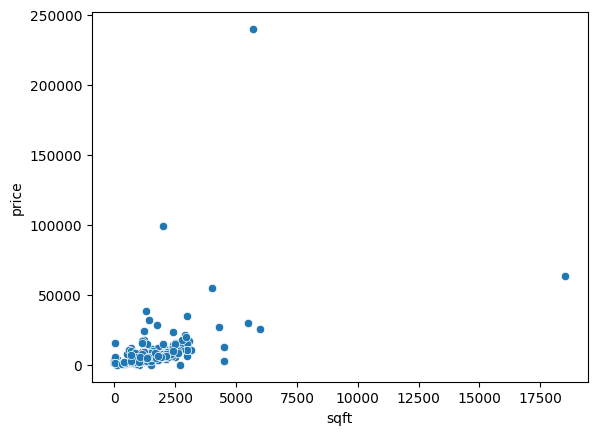

In [48]:
sns.scatterplot(x = 'sqft', y = 'price', data = data)

#### 3. Modeling
#### 3.1 Data Pre-processing

preparing columns data for the machine learning model

* Converting categorical columns to numerical

#### Outlier treatment

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        452 non-null    object 
 1   city         452 non-null    object 
 2   house_type   452 non-null    object 
 3   sqft         452 non-null    float64
 4   bedrooms     452 non-null    float64
 5   bathrooms    452 non-null    float64
 6   furnishing   452 non-null    object 
 7   constr_info  452 non-null    object 
 8   floor_no     452 non-null    float64
 9   facing       452 non-null    object 
 10  price        452 non-null    float64
dtypes: float64(5), object(6)
memory usage: 39.0+ KB


<Axes: ylabel='price'>

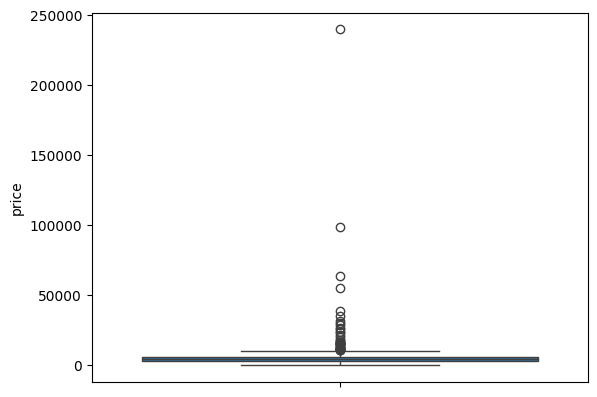

In [50]:
sns.boxplot(data.price)

In [51]:
def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        low=df[i].quantile(0.05)
        high=df[i].quantile(0.95)
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        df[i] = df[i].mask(df[i]<LTV,low)
        df[i] = df[i].mask(df[i]>UTV,high)
    return df

In [52]:
data = outlier_detect(data)

<Axes: ylabel='price'>

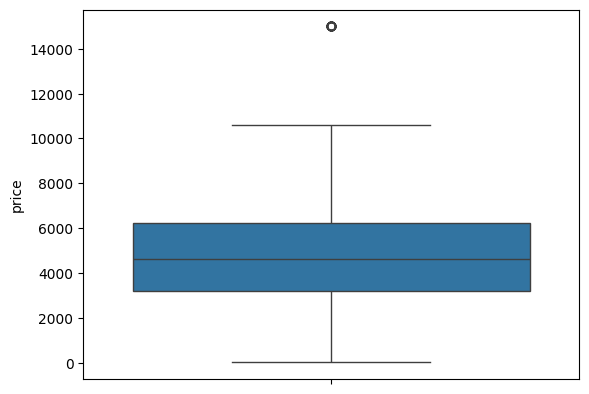

In [53]:
sns.boxplot(data.price)

#### One_Hot Encoding

Converting categorical to numerical columns

In [54]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse = False)

In [55]:
cats = pd.DataFrame(ohe.fit_transform(data.iloc[:,[0,1,2,6,7,9]]))

In [56]:
cats.columns = ohe.get_feature_names_out()

In [57]:
data.iloc[:,[3,4,5,8,10]]

,sqft,bedrooms,bathrooms,floor_no,price
0,1481.0,3.0,3.0,5.0,8530.0
1,1650.0,3.0,3.0,1.0,10500.0
2,2600.0,4.0,4.0,5.0,15000.0
3,2600.0,4.0,2.0,1.0,15000.0
4,450.0,1.0,1.0,1.0,1050.0
...,...,...,...,...,...
447,1900.0,3.0,3.0,1.0,5500.0
448,1686.0,3.0,3.0,1.0,8400.0
449,1384.0,3.0,2.0,5.0,5400.0
450,1785.0,3.0,3.0,1.0,6200.0


In [58]:
mdata = pd.concat([data.iloc[:,[3,4,5,8,10]],cats], axis=1)

In [59]:
mdata

,sqft,bedrooms,bathrooms,floor_no,price,state_ Andhra Pradesh,state_ Assam,state_ Bihar,state_ Chhattisgarh,state_ Delhi,...,constr_info_readytomove,constr_info_underconstruction,facing_east,facing_north,facing_northeast,facing_northwest,facing_south,facing_southeast,facing_southwest,facing_west
0,1481.0,3.0,3.0,5.0,8530.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1650.0,3.0,3.0,1.0,10500.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2600.0,4.0,4.0,5.0,15000.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2600.0,4.0,2.0,1.0,15000.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,450.0,1.0,1.0,1.0,1050.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,1900.0,3.0,3.0,1.0,5500.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
448,1686.0,3.0,3.0,1.0,8400.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
449,1384.0,3.0,2.0,5.0,5400.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
450,1785.0,3.0,3.0,1.0,6200.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 3.2 X & Y

In [60]:
X = mdata.drop('price',axis=1)

In [61]:
y = mdata['price']

#### 3.3 Train & Test Split of Data for ML Model

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 3.4 Regression Models

As the data is not linear , we are observing non-linear models

#### Random Forest Regressor Model

#### Training Model with Train data

In [63]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_model.score(X_train, y_train)

0.9239881212212571

In [64]:
y_pred = rf_model.predict(X_test)
rf_model.score(X_test, y_test)

0.7067501801558882

<Axes: xlabel='price', ylabel='Density'>

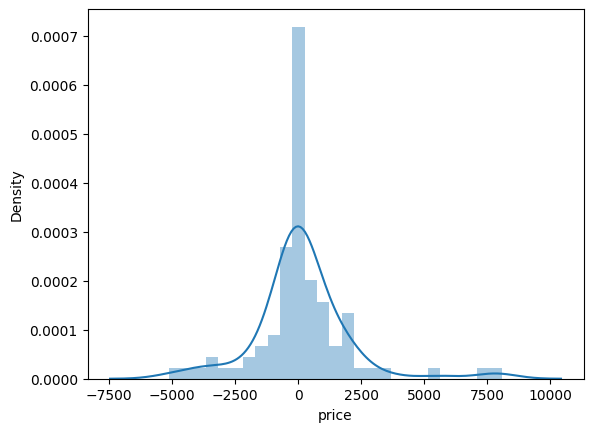

In [65]:
sns.distplot(y_test - y_pred)

In [66]:
from sklearn import metrics
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  1123.8262135897437
MSE:  3669713.463640005
RMSE:  1915.6496192258137


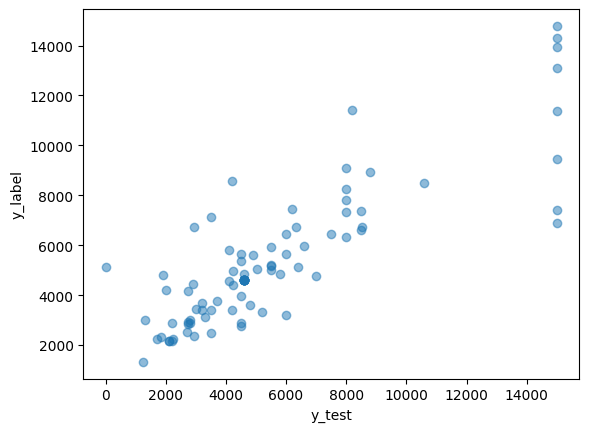

In [67]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_label')
plt.show()

In [68]:
metrics.r2_score(y_test, y_pred)

0.7067501801558882

#### 3.5 Realtime Estimation

In [69]:
data.head()

,state,city,house_type,sqft,bedrooms,bathrooms,furnishing,constr_info,floor_no,facing,price
0,Punjab,Mohali,apartments,1481.0,3.0,3.0,semifurnished,newlaunch,5.0,northeast,8530.0
1,Karnataka,Mysuru,housesvillas,1650.0,3.0,3.0,furnished,readytomove,1.0,southeast,10500.0
2,Gujarat,Surat,apartments,2600.0,4.0,4.0,semifurnished,readytomove,5.0,east,15000.0
3,Kerala,Kochi,housesvillas,2600.0,4.0,2.0,semifurnished,readytomove,1.0,east,15000.0
4,Rajasthan,Jaipur,apartments,450.0,1.0,1.0,semifurnished,readytomove,1.0,east,1050.0


One Example for Prediction

In [70]:
check = [['kerala','kochi','apartments',1000,3,2,'furnished','newlaunch',5,'east']]

In [71]:
check = pd.DataFrame(check, columns = ['state', 'city', 'house_type', 'sqft', 'bedrooms', 'bathrooms',
       'furnishing', 'constr_info','floor_no','facing'])

In [72]:
cats = pd.DataFrame(ohe.transform(check.iloc[:,[0,1,2,6,7,9]]))

In [73]:
cats

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
cats.columns = ohe.get_feature_names_out()

In [75]:
check = pd.concat([check.iloc[:,[3,4,5,8]],cats], axis=1)

In [76]:
check

,sqft,bedrooms,bathrooms,floor_no,state_ Andhra Pradesh,state_ Assam,state_ Bihar,state_ Chhattisgarh,state_ Delhi,state_ Gujarat,...,constr_info_readytomove,constr_info_underconstruction,facing_east,facing_north,facing_northeast,facing_northwest,facing_south,facing_southeast,facing_southwest,facing_west
0,1000,3,2,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
rf_model.predict(check)[0]

3397.3543399999994

In [78]:
3592*1000 # multiplying with 1000 to get actual value in rupees

3592000

One Function for Predict

In [79]:
data.columns

Index(['state', 'city', 'house_type', 'sqft', 'bedrooms', 'bathrooms',
       'furnishing', 'constr_info', 'floor_no', 'facing', 'price'],
      dtype='object')

**Need to give same column data for predictions except price**

In [80]:
def predict_houseprice():
    
    print("Enter the Following Details To Estimate a House Value:")
    print()
    state = input("Enter State Name: ")
    city = input("Enter City Name from State: ")
    house_type = input("Enter House Type (apartments/housevillas/builderfloors/farmhouses): ")
    sqft = float(input("Enter number of Sqft: "))
    bedrooms = int(input("Enter number of Bedrooms: "))
    bathrooms = int(input("Enter number of Bathrooms: "))
    furnishing = input("Enter Furnishing Info (unfurnished/semifurnsihed/furnished): ")
    constr = input("Enter Construction Info (newlaunch/readytomove/underconstruction): ")
    floor = int(input("Enter floor number: "))
    facing = input("Enter Facing: ")
    
    print()
    
    data = [[state,city,house_type,sqft,bedrooms,bathrooms,furnishing,constr,floor,facing]]
    data = pd.DataFrame(data, columns = ['state', 'city', 'house_type', 'sqft', 'bedrooms', 'bathrooms',
       'furnishing', 'constr_info','floor_no','facing'])
    
    print("Given data: ")
    display(data)
    cats = pd.DataFrame(ohe.transform(data.iloc[:,[0,1,2,6,7,9]]))
    cats.columns = ohe.get_feature_names_out()
    row = pd.concat([data.iloc[:,[3,4,5,8]],cats], axis=1)
        
    # predictions
    price = rf_model.predict(row)[0]
    roundedprice = round((price*1000)/100000,2)  
    print()
    print("Estimated Price Value: ", "₹ "+str(roundedprice)+" lacs")

In [81]:
predict_houseprice()

Enter the Following Details To Estimate a House Value:

Enter State Name: tamil nadu
Enter City Name from State: chennai
Enter House Type (apartments/housevillas/builderfloors/farmhouses): apartments
Enter number of Sqft: 2000
Enter number of Bedrooms: 2
Enter number of Bathrooms: 2
Enter Furnishing Info (unfurnished/semifurnsihed/furnished): furnished
Enter Construction Info (newlaunch/readytomove/underconstruction): newlaunch
Enter floor number: 2
Enter Facing: north

Given data: 


,state,city,house_type,sqft,bedrooms,bathrooms,furnishing,constr_info,floor_no,facing
0,tamil nadu,chennai,apartments,2000.0,2,2,furnished,newlaunch,2,north



Estimated Price Value:  ₹ 71.38 lacs
